#Creating Restaurant's database

In [1]:
# importing the relevant libraries
import sqlite3
import pandas as pd

In [2]:
# Creating new SQlite database
conn = sqlite3.connect('restaurants.db')
cursor = conn.cursor()

In [3]:
# creating restaurants table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS restaurants (
        business_id TEXT PRIMARY KEY,
        name TEXT,
        address TEXT,
        city TEXT,
        state TEXT,
        postal_code TEXT,
        latitude REAL,
        longitude REAL,
        stars REAL,
        review_count INTEGER,
        is_open INTEGER,
        attributes TEXT,
        categories TEXT,
        hours TEXT
    )
''')

# Create reviews table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS reviews (
        review_id INTEGER PRIMARY KEY AUTOINCREMENT,
        restaurant TEXT,
        reviewer TEXT,
        review TEXT,
        rating INTEGER,
        metadata TEXT,
        time TEXT,
        pictures INTEGER,
        FOREIGN KEY (restaurant) REFERENCES restaurants(name)
    )
''')

conn.commit()


In [4]:
# loading the CSV files into dataframes
restaurants_df = pd.read_csv('restaurants.csv')
reviews_df = pd.read_csv('Restaurant reviews.csv')

In [7]:
# Check for and remove duplicate 'business_id'
restaurants_df = restaurants_df.drop_duplicates(subset=['business_id'], keep='first')

# Inserting data into restaurants table
try:
  restaurants_df.to_sql('restaurants', conn, if_exists='append', index=False)
except sqlite3.IntegrityError as e:
  print(f"Error inserting data: {e}")
  print("Likely due to duplicate 'business_id'. Please ensure 'business_id' is unique in your data.")
# Inserting data into reviews table
reviews_df.to_sql('Restaurant reviews', conn, if_exists='append', index=False)

# Inserting data into reviews table (renamed to avoid spaces)
try:
    reviews_df.to_sql('Restaurant_reviews', conn, if_exists='append', index=False)
except sqlite3.IntegrityError as e:
    print(f"Error inserting data into 'Restaurant_reviews' table: {e}")
    print("Please ensure no constraint (e.g., primary key or foreign key) violations.")
except Exception as e:
    print(f"Unexpected error: {e}")

Error inserting data: UNIQUE constraint failed: restaurants.business_id
Likely due to duplicate 'business_id'. Please ensure 'business_id' is unique in your data.


# Querying the data



In [9]:
cursor.execute('SELECT * FROM reviews LIMIT 5')
reviews = cursor.fetchall()
for review in reviews:
    print(review)

(1, 'Beyond Flavours', 'Rusha Chakraborty', 'The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.', 5, '1 Review , 2 Followers', '5/25/2019 15:54', 0)
(2, 'Beyond Flavours', 'Anusha Tirumalaneedi', 'Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service', 5, '3 Reviews , 2 Followers', '5/25/2019 14:20', 0)
(3, 'Beyond Flavours', 'Ashok Shekhawat', 'A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.', 5, '2 Reviews , 3 Followers', '5/24/2019 22:54', 0)
(4, 'Beyond Flavours', 'Swapnil Sarkar', 'Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off 

In [10]:
# Read the data from both tables into Pandas DataFrames
restaurants_df = pd.read_sql_query("SELECT * FROM restaurants", conn)
reviews_df = pd.read_sql_query("SELECT * FROM reviews", conn)

# Display the first few rows to ensure data is loaded
restaurants_df.head(), reviews_df.head()

(              business_id                   name              address  \
 0  MTSW4McQd7CbVtyjqoe9mw     St Honore Pastries          935 Race St   
 1  CF33F8-E6oudUQ46HnavjQ         Sonic Drive-In        615 S Main St   
 2  k0hlBqXX-Bt0vf1op7Jr1w  Tsevi's Pub And Grill    8025 Mackenzie Rd   
 3  bBDDEgkFA1Otx9Lfe7BZUQ         Sonic Drive-In  2312 Dickerson Pike   
 4  eEOYSgkmpB90uNA7lDOMRA  Vietnamese Food Truck                 None   
 
            city state postal_code   latitude  longitude  stars  review_count  \
 0  Philadelphia    PA       19107  39.955505 -75.155564    4.0            80   
 1  Ashland City    TN       37015  36.269593 -87.058943    2.0             6   
 2        Affton    MO       63123  38.565165 -90.321087    3.0            19   
 3     Nashville    TN       37207  36.208102 -86.768170    1.5            10   
 4     Tampa Bay    FL       33602  27.955269 -82.456320    4.0            10   
 
    is_open                                         attributes  \


#Numerical data Preprocessing

In [13]:
# Basic statistics for numeric columns (ratings, stars, etc.) using sqlite3

# Calculate average rating for reviews
cursor.execute("SELECT AVG(rating) FROM reviews")
avg_rating = cursor.fetchone()[0]
print(f"Average Review Rating: {avg_rating}")

Average Review Rating: 3.6006825938566553


In [14]:
# Calculate average stars for restaurants
cursor.execute("SELECT AVG(stars) FROM restaurants")
avg_stars = cursor.fetchone()[0]
print(f"Average Restaurant Stars: {avg_stars}")

Average Restaurant Stars: 3.5152335233140803


In [15]:
# Calculate the number of restaurants in each city
cursor.execute("SELECT city, COUNT(*) FROM restaurants GROUP BY city")
city_counts = cursor.fetchall()
print("Number of restaurants in each city:")
for city, count in city_counts:
  print(f"{city}: {count}")

Number of restaurants in each city:
Abington: 54
Abington Township: 1
Affton: 18
Aldan: 6
Algiers: 1
Alloway: 2
Alton: 84
Ambler: 83
Antioch: 103
Apollo Beach: 42
Arabi: 15
Ardmore: 126
Arnold: 95
Ashland: 1
Ashland City: 24
Aston: 51
Atco: 9
Audubon: 51
Audubon : 1
Avon: 110
Avondale: 20
BOISE: 1
BRANDON: 1
Bala Cynwyd: 54
Ballwin: 72
Balm: 1
Bargersville: 3
Barrington: 16
Bayonet Point: 2
Beaumont: 8
Beech Grove: 16
Bel Ridge: 1
Belle Chase: 1
Belle Chasse: 21
Belle Meade: 2
Belleair Blf: 2
Belleair Bluffs: 14
Bellefontaine: 1
Bellefontaine Neighbors: 1
Belleville: 146
Bellevue: 11
Bellmawr: 20
Bellville: 1
Belmont Hills: 1
Bensalem: 165
Bensalem Township: 1
Bensalem. Pa: 1
Berkeley: 7
Berlin: 36
Berlin Township: 3
Berry Hill: 3
Berwyn: 46
Bethalto: 6
Bethel: 1
Bethel Township: 1
Beverly: 8
Birchrunville: 2
Black Jack: 1
Blackwood: 46
Blackwood : 1
Blooming Glen: 1
Blue Bell: 66
Blvd: 1
Boise: 849
Boise City: 7
Boone: 2
Boothwyn: 19
Bordentown: 40
Boyertown: 24
Brandon: 326
Breckenri

In [16]:
# Calculate the maximum number of reviews for a restaurant
cursor.execute("SELECT MAX(review_count) FROM restaurants")
max_reviews = cursor.fetchone()[0]
print(f"Maximum number of reviews for a restaurant: {max_reviews}")

Maximum number of reviews for a restaurant: 7568


In [17]:
# Calculate the number of open restaurants
cursor.execute("SELECT COUNT(*) FROM restaurants WHERE is_open = 1")
open_restaurants = cursor.fetchone()[0]
print(f"Number of open restaurants: {open_restaurants}")

Number of open restaurants: 35004


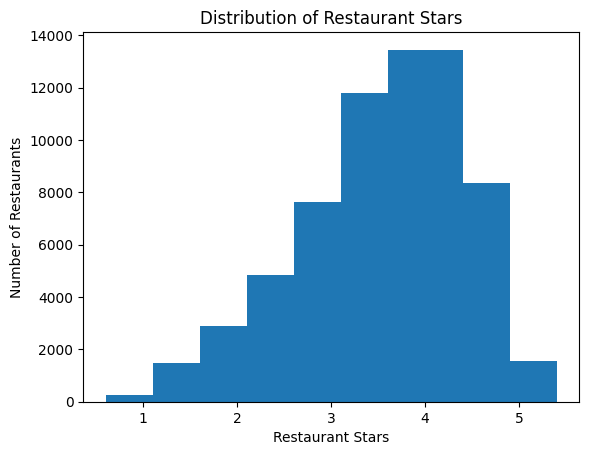

In [18]:
#EDA analysis using sqlite3

import matplotlib.pyplot as plt

# Calculate the distribution of restaurant ratings
cursor.execute("SELECT stars, COUNT(*) FROM restaurants GROUP BY stars")
star_counts = cursor.fetchall()
stars = [row[0] for row in star_counts]
counts = [row[1] for row in star_counts]

plt.bar(stars, counts)
plt.xlabel("Restaurant Stars")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Restaurant Stars")
plt.show()


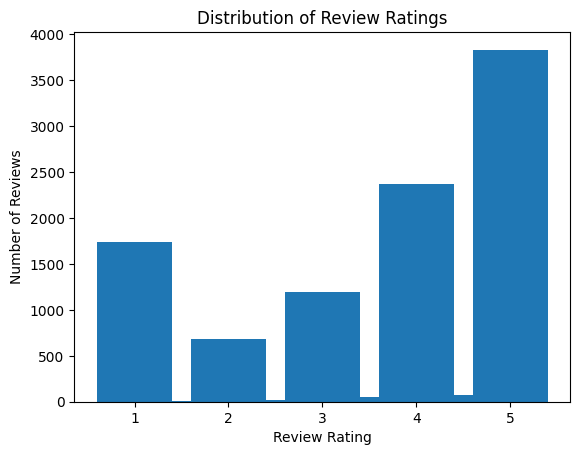

In [24]:
# Calculate the distribution of review ratings
cursor.execute("SELECT rating, COUNT(*) FROM reviews GROUP BY rating")
rating_counts = cursor.fetchall()

# Filter rating_counts before extracting ratings and counts
filtered_rating_counts = [(r, c) for r, c in rating_counts if r is not None and r != 'Like']

ratings = [float(row[0]) for row in filtered_rating_counts]
counts = [row[1] for row in filtered_rating_counts]

plt.bar(ratings, counts)
plt.xlabel("Review Rating")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Review Ratings")
plt.show()



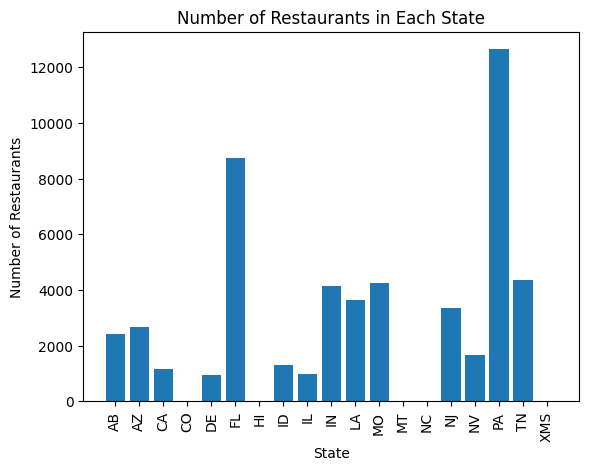

In [25]:
# Calculate the number of restaurants in each state
cursor.execute("SELECT state, COUNT(*) FROM restaurants GROUP BY state")
state_counts = cursor.fetchall()
states = [row[0] for row in state_counts]
counts = [row[1] for row in state_counts]

plt.bar(states, counts)
plt.xlabel("State")
plt.ylabel("Number of Restaurants")
plt.title("Number of Restaurants in Each State")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

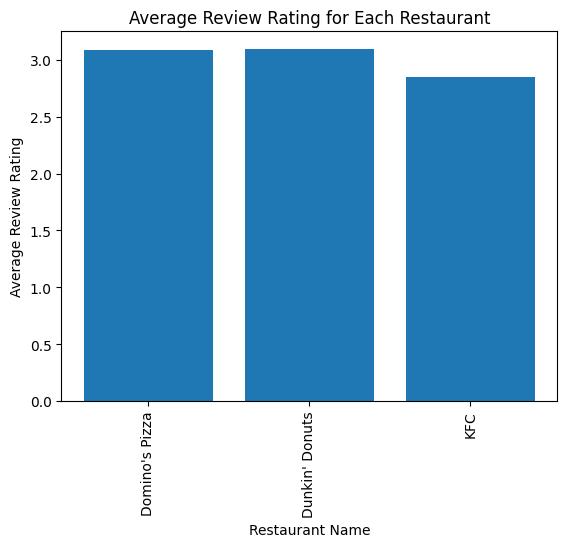

In [26]:
# Calculate the average review rating for each restaurant
cursor.execute("""
    SELECT r.name, AVG(rv.rating) AS avg_rating
    FROM restaurants r
    JOIN reviews rv ON r.name = rv.restaurant
    GROUP BY r.name
""")
restaurant_ratings = cursor.fetchall()
restaurant_names = [row[0] for row in restaurant_ratings]
avg_ratings = [row[1] for row in restaurant_ratings]

plt.bar(restaurant_names, avg_ratings)
plt.xlabel("Restaurant Name")
plt.ylabel("Average Review Rating")
plt.title("Average Review Rating for Each Restaurant")
plt.xticks(rotation=90)
plt.show()

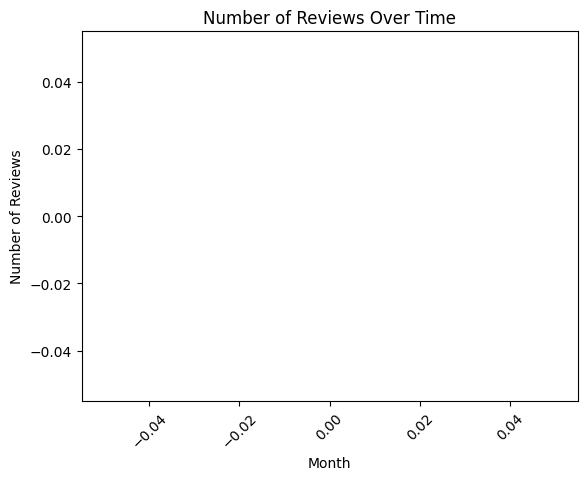

In [27]:
# Calculate the number of reviews over time
cursor.execute("SELECT STRFTIME('%Y-%m', time) AS review_month, COUNT(*) FROM reviews GROUP BY review_month")
review_counts_over_time = cursor.fetchall()
review_months = [row[0] for row in review_counts_over_time]
review_counts = [row[1] for row in review_counts_over_time]

plt.plot(review_months, review_counts)
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews Over Time")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# prompt: perform EDA and plot  using sqlite3

import matplotlib.pyplot as plt

# Calculate the distribution of restaurant ratings
cursor.execute("SELECT stars, COUNT(*) FROM restaurants GROUP BY stars")
star_counts = cursor.fetchall()
stars = [row[0] for row in star_counts]
counts = [row[1] for row in star_counts]

plt.bar(stars, counts)
plt.xlabel("Restaurant Stars")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Restaurant Stars")
plt.show()

# Calculate the distribution of review ratings
cursor.execute("SELECT rating, COUNT(*) FROM reviews GROUP BY rating")
rating_counts = cursor.fetchall()
ratings = [row[0] for row in rating_counts]
counts = [row[1] for row in rating_counts]

plt.bar(ratings, counts)
plt.xlabel("Review Rating")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Review Ratings")
plt.show()

# Calculate the number of restaurants in each state
cursor.execute("SELECT state, COUNT(*) FROM restaurants GROUP BY state")
state_counts = cursor.fetchall()
states = [row[0] for row in state_counts]
counts = [row[1] for row in state_counts]

plt.bar(states, counts)
plt.xlabel("State")
plt.ylabel("Number of Restaurants")
plt.title("Number of Restaurants in Each State")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Calculate the average review rating for each restaurant
cursor.execute("""
    SELECT r.name, AVG(rv.rating) AS avg_rating
    FROM restaurants r
    JOIN reviews rv ON r.name = rv.restaurant
    GROUP BY r.name
""")
restaurant_ratings = cursor.fetchall()
restaurant_names = [row[0] for row in restaurant_ratings]
avg_ratings = [row[1] for row in restaurant_ratings]

plt.bar(restaurant_names, avg_ratings)
plt.xlabel("Restaurant Name")
plt.ylabel("Average Review Rating")
plt.title("Average Review Rating for Each Restaurant")
plt.xticks(rotation=90)
plt.show()

# Calculate the number of reviews over time
cursor.execute("SELECT STRFTIME('%Y-%m', time) AS review_month, COUNT(*) FROM reviews GROUP BY review_month")
review_counts_over_time = cursor.fetchall()
review_months = [row[0] for row in review_counts_over_time]
review_counts = [row[1] for row in review_counts_over_time]

plt.plot(review_months, review_counts)
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews Over Time")
plt.xticks(rotation=45)
plt.show()


In [11]:
# Basic statistics for numeric columns (ratings, stars, etc.)
merged_df[['rating', 'stars', 'review_count']].describe()

NameError: name 'merged_df' is not defined

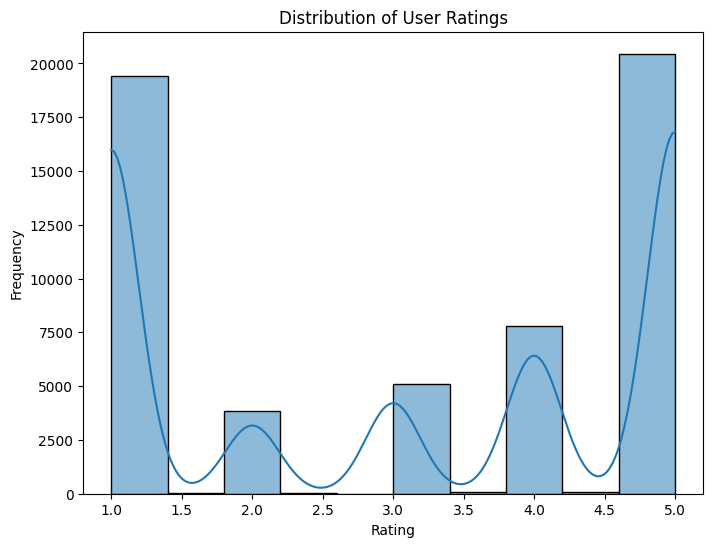

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace non-numeric values in 'rating' column with NaN
merged_df['rating'] = pd.to_numeric(merged_df['rating'], errors='coerce')

# Drop rows with NaN values in 'rating' column
merged_df = merged_df.dropna(subset=['rating'])

# Plot the distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['rating'], bins=10, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Plot the distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['rating'], bins=10, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df = pd.read_csv('restaurants.csv')

# Display basic information about the dataset
print(df.info())

# Show the first few rows
print(df.head())

# Display unique categories
print("Unique categories:")
print(df['categories'].nunique())
print("\
Sample categories:")
print(df['categories'].sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52286 entries, 0 to 52285
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   52286 non-null  object 
 1   name          52286 non-null  object 
 2   address       51843 non-null  object 
 3   city          52286 non-null  object 
 4   state         52286 non-null  object 
 5   postal_code   52265 non-null  object 
 6   latitude      52286 non-null  float64
 7   longitude     52286 non-null  float64
 8   stars         52286 non-null  float64
 9   review_count  52286 non-null  int64  
 10  is_open       52286 non-null  int64  
 11  attributes    51720 non-null  object 
 12  categories    52286 non-null  object 
 13  hours         45007 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 5.6+ MB
None
              business_id                   name              address  \
0  MTSW4McQd7CbVtyjqoe9mw     St Honore Pastries          935 R

In [ ]:
# Create a CountVectorizer to transform the categories into a matrix
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '))
category_matrix = vectorizer.fit_transform(df['categories'].fillna(''))

# Calculate the cosine similarity between the categories
cosine_sim = cosine_similarity(category_matrix, category_matrix)

NameError: name 'CountVectorizer' is not defined

In [ ]:
# Function to get recommendations based on a restaurant index
def get_recommendations(index, cosine_sim=cosine_sim, df=df):
    # Get the pairwise similarity scores of all restaurants with the given restaurant
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the restaurants based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar restaurants
    sim_scores = sim_scores[1:11]

    # Get the restaurant indices
    restaurant_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar restaurants
    return df.iloc[restaurant_indices]


NameError: name 'cosine_sim' is not defined

In [ ]:
# Test the recommendation system with the first restaurant
recommended_restaurants = get_recommendations(0)

# Display the recommended restaurants
print(recommended_restaurants[['name', 'categories', 'stars']])